In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('goodreads_data.csv')
data.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [5]:
data.describe()

,Unnamed: 0,Avg_Rating
count,10000.00000,10000.000000
mean,4999.50000,4.068577
std,2886.89568,0.335359
min,0.00000,0.000000
25%,2499.75000,3.880000
50%,4999.50000,4.080000
75%,7499.25000,4.260000
max,9999.00000,5.000000


In [6]:
data['Num_Ratings'] = data['Num_Ratings'].str.replace(',', '').astype(int)

In [7]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
data['Description'].fillna('No description available', inplace=True)

In [9]:
data['Author'].value_counts().head(10)

Stephen King           57
William Shakespeare    39
Terry Pratchett        35
Agatha Christie        33
Anonymous              28
Rick Riordan           26
John Grisham           23
Julie Mannino          22
Lucian Bane            22
C.S. Lewis             20
Name: Author, dtype: int64

<Axes: xlabel='Avg_Rating', ylabel='Count'>

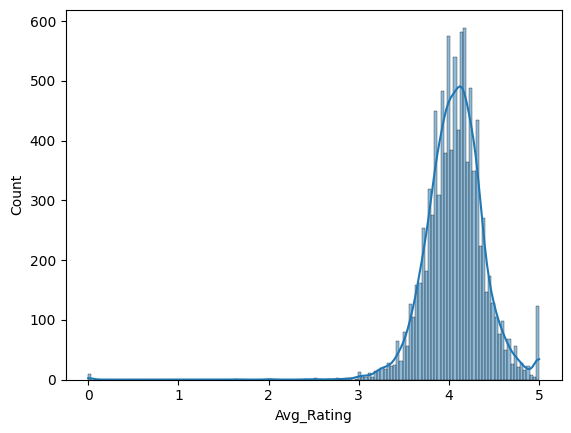

In [10]:
import seaborn as sns
sns.histplot(data['Avg_Rating'], kde=True)

In [11]:
from ast import literal_eval
genres = data['Genres'].apply(literal_eval).explode()
genres.value_counts().head(10)

Fiction               5700
Nonfiction            2330
Fantasy               2195
Classics              2123
Romance               1558
Young Adult           1522
Historical Fiction    1481
Mystery               1357
Contemporary          1302
Audiobook             1242
Name: Genres, dtype: int64

<Axes: xlabel='Num_Ratings', ylabel='Avg_Rating'>

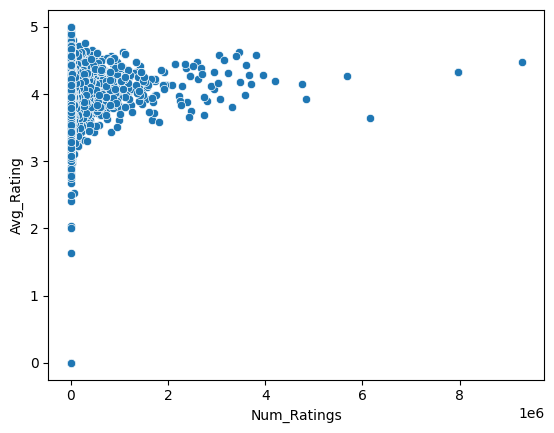

In [12]:
sns.scatterplot(x='Num_Ratings', y='Avg_Rating', data=data)

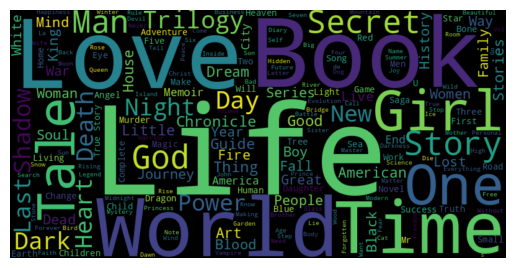

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(data['Book'])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
authors = data.groupby('Author').filter(lambda x: len(x) > 5)
authors.groupby('Author')['Avg_Rating'].mean().sort_values(ascending=False)

Author
Alex Letner           4.723636
Maria Johnsen         4.711111
Widad Akreyi          4.658571
Tamuna Tsertsvadze    4.655714
Julie-Anne Gamble     4.638000
                        ...   
J.G. Ballard          3.605000
Rupert Thomson        3.593333
Chuck Palahniuk       3.571500
Avery Aster           3.555000
Bret Easton Ellis     3.552857
Name: Avg_Rating, Length: 221, dtype: float64

<Axes: xlabel='Avg_Rating', ylabel='Desc_Length'>

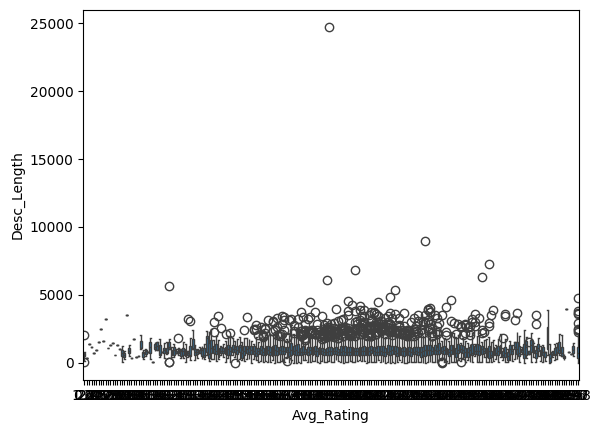

In [15]:
data['Desc_Length'] = data['Description'].apply(len)
sns.boxplot(x='Avg_Rating', y='Desc_Length', data=data)

In [16]:
popular_books = data[data['Num_Ratings'] > 1e6]
popular_books[['Book', 'Author', 'Avg_Rating']]

,Book,Author,Avg_Rating
0,To Kill a Mockingbird,Harper Lee,4.27
1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,4.47
2,Pride and Prejudice,Jane Austen,4.28
3,The Diary of a Young Girl,Anne Frank,4.18
4,Animal Farm,George Orwell,3.98
...,...,...,...
8225,The Nightingale,Kristin Hannah,4.60
8279,Eleanor Oliphant Is Completely Fine,Gail Honeyman,4.25
8333,The Nightingale,Kristin Hannah,4.60
8367,The Martian,Andy Weir,4.41


<Axes: >

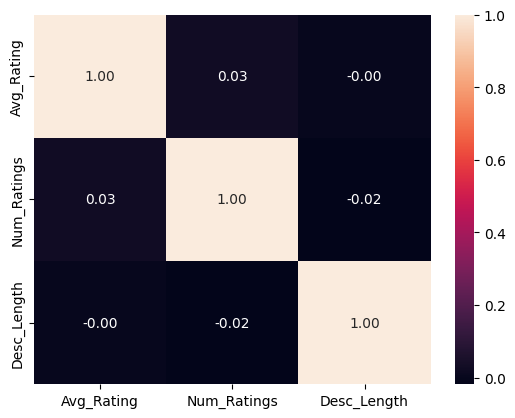

In [17]:
sns.heatmap(data[['Avg_Rating', 'Num_Ratings', 'Desc_Length']].corr(), annot=True, fmt=".2f")

<Axes: xlabel='Year'>

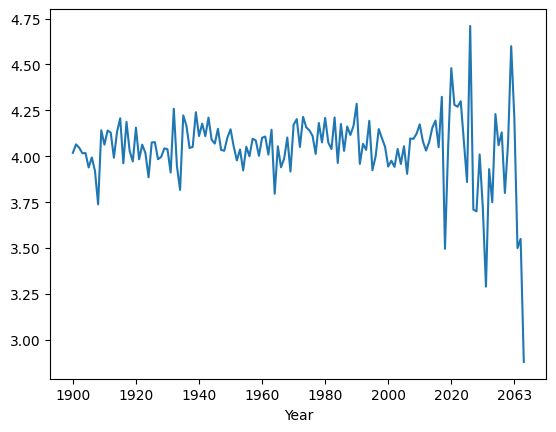

In [18]:
import re
data['Year'] = data['Description'].apply(lambda x: re.search(r'\b(19|20)\d{2}\b', str(x)))
data['Year'] = data['Year'].apply(lambda x: x.group(0) if x else None)
data.groupby('Year')['Avg_Rating'].mean().plot()

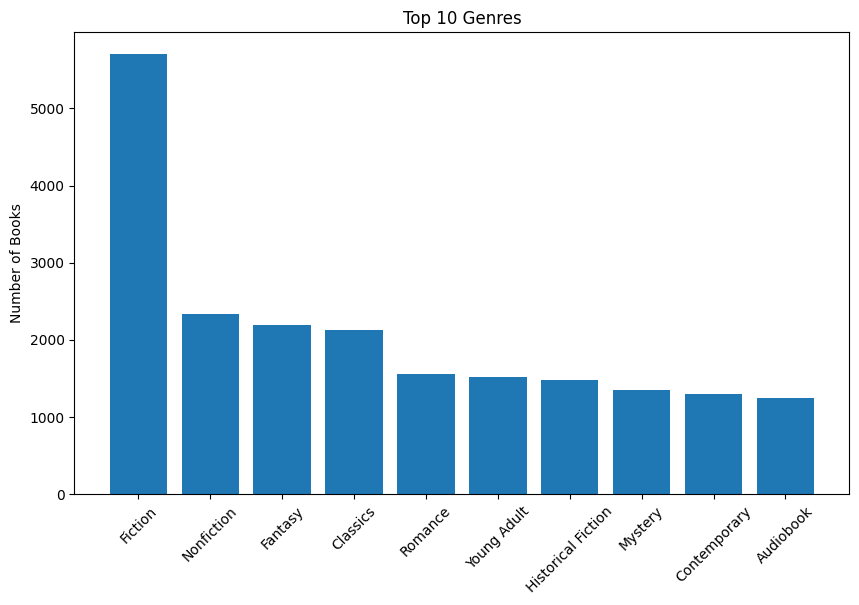

In [20]:
from collections import Counter
import ast

all_genres = [genre for sublist in data['Genres'].apply(ast.literal_eval) for genre in sublist]

genre_counts = Counter(all_genres)

top_genres = genre_counts.most_common(10)

plt.figure(figsize=(10, 6))
genres, counts = zip(*top_genres)
plt.bar(genres, counts)
plt.title('Top 10 Genres')
plt.xticks(rotation=45)
plt.ylabel('Number of Books')
plt.show()

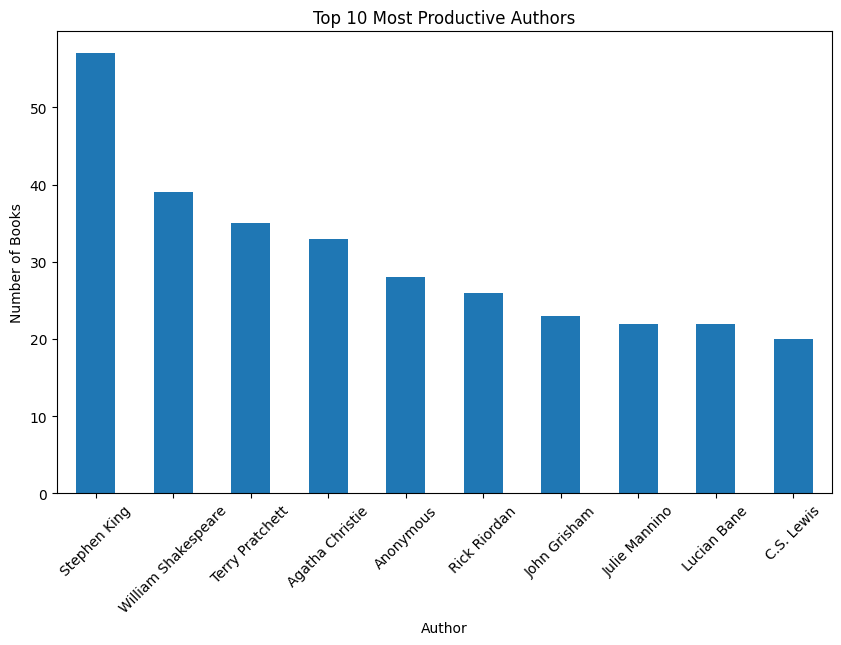

In [23]:
author_counts = data['Author'].value_counts().head(10)

plt.figure(figsize=(10, 6))
author_counts.plot(kind='bar')
plt.title('Top 10 Most Productive Authors')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

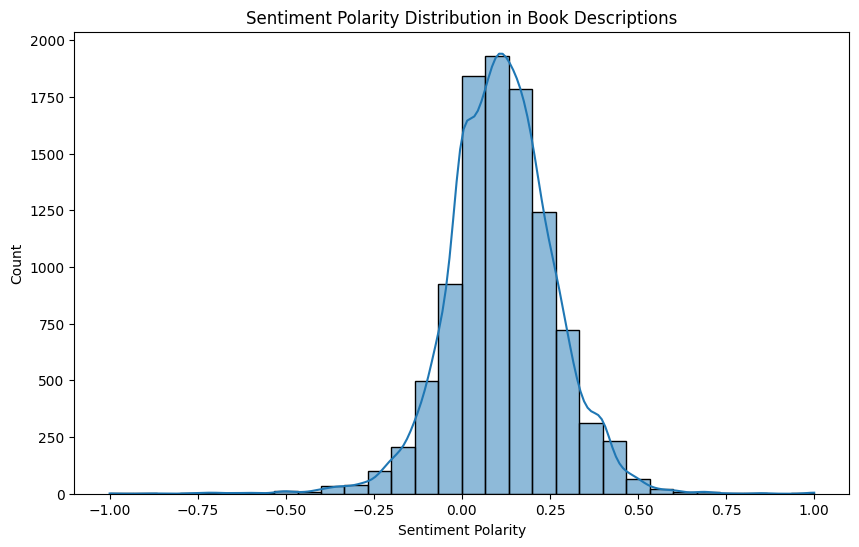

In [24]:
from textblob import TextBlob

def calculate_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

data['Sentiment'] = data['Description'].apply(calculate_sentiment)

plt.figure(figsize=(10, 6))
sns.histplot(data['Sentiment'].dropna(), bins=30, kde=True)
plt.title('Sentiment Polarity Distribution in Book Descriptions')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()